In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

2023-04-25 10:55:24.473290: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-04-25 10:55:25.808775: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: :/home/soumik/anaconda3/pkgs/cuda-nvcc
2023-04-25 10:55:25.808888: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer_plugin.so.7'; dlerror: libnvinfer_plugin.so.7: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: :/home/soumik/anaconda3/pkgs/cuda-nvcc
2023-04-25 10:55:25.808896: W tensorflow/compiler/tf

In [2]:
from sklearn.datasets import make_circles
n_samples=1000
X,y=make_circles(n_samples,noise=0.03,random_state=42)

In [3]:
X

array([[ 0.75424625,  0.23148074],
       [-0.75615888,  0.15325888],
       [-0.81539193,  0.17328203],
       ...,
       [-0.13690036, -0.81001183],
       [ 0.67036156, -0.76750154],
       [ 0.28105665,  0.96382443]])

In [4]:
y[:10]

array([1, 1, 1, 1, 0, 1, 1, 1, 1, 0])

In [5]:
import pandas as pd
circles=pd.DataFrame({"X0":X[:,0],"X1":X[:,1],"label":y})
circles

,X0,X1,label
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1
4,0.442208,-0.896723,0
...,...,...,...
995,0.244054,0.944125,0
996,-0.978655,-0.272373,0
997,-0.136900,-0.810012,1
998,0.670362,-0.767502,0


In [6]:
circles["label"].value_counts()

label
1    500
0    500
Name: count, dtype: int64

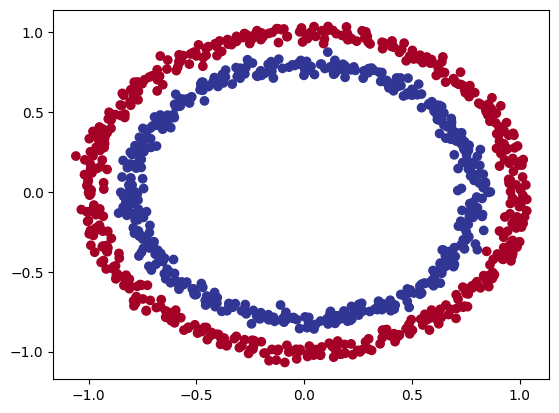

In [7]:
plt.scatter(circles["X0"],circles["X1"],c=y,cmap=plt.cm.RdYlBu)

In [8]:
X.shape,y.shape

((1000, 2), (1000,))

In [9]:
len(X),len(y)

(1000, 1000)

In [10]:
tf.random.set_seed(42)

model=tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

model.compile(loss=tf.keras.losses.BinaryCrossentropy(),
              optimizer=tf.keras.optimizers.SGD(),
              metrics=["accuracy"])

model.fit(X,y,epochs=100)

Epoch 1/100


2023-04-25 10:55:29.049528: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:981] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-04-25 10:55:29.140516: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:981] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-04-25 10:55:29.140748: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:981] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-04-25 10:55:29.141597: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorF

32/32 [==============================] - 4s 1ms/step - loss: 4.2182 - accuracy: 0.4740
Epoch 2/100
32/32 [==============================] - 0s 1ms/step - loss: 1.5953 - accuracy: 0.4920
Epoch 3/100
32/32 [==============================] - 0s 1ms/step - loss: 0.7329 - accuracy: 0.4960
Epoch 4/100
 1/32 [..............................] - ETA: 0s - loss: 0.7709 - accuracy: 0.3125

2023-04-25 10:55:34.957784: I tensorflow/compiler/jit/xla_compilation_cache.cc:477] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


32/32 [==============================] - 0s 1ms/step - loss: 0.7059 - accuracy: 0.4970
Epoch 5/100
32/32 [==============================] - 0s 1ms/step - loss: 0.6978 - accuracy: 0.4930
Epoch 6/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6948 - accuracy: 0.4820
Epoch 7/100
32/32 [==============================] - 0s 1ms/step - loss: 0.6948 - accuracy: 0.5030
Epoch 8/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6943 - accuracy: 0.4850
Epoch 9/100
32/32 [==============================] - 0s 1ms/step - loss: 0.6941 - accuracy: 0.4990
Epoch 10/100
32/32 [==============================] - 0s 1ms/step - loss: 0.6938 - accuracy: 0.4580
Epoch 11/100
32/32 [==============================] - 0s 1ms/step - loss: 0.6944 - accuracy: 0.4600
Epoch 12/100
32/32 [==============================] - 0s 1ms/step - loss: 0.6945 - accuracy: 0.4830
Epoch 13/100
32/32 [==============================] - 0s 1ms/step - loss: 0.6944 - accuracy: 0.4790
Epoch 14/100
32/32

In [11]:
tf.random.set_seed(42)

model1=tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1),
])

model1.compile(loss=tf.keras.losses.BinaryCrossentropy(),
              optimizer=tf.keras.optimizers.Adam(),
              metrics=["accuracy"])

model1.fit(X,y,epochs=100,verbose=0)

2023-04-25 10:55:39.923651: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:268] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.


In [12]:
model1.evaluate(X,y)

32/32 [==============================] - 0s 948us/step - loss: 0.6972 - accuracy: 0.5040


[0.6972177028656006, 0.5040000081062317]

In [13]:
def plot_decision_boundary(model, X, y):
    """
    Plots the decision boundary created by a model predicting on X.
    This function has been adapted from two phenomenal resources:
    1. CS231n - https://cs231n.github.io/neural-networks-case-study/
    2. Made with ML basics - https://github.com/GokuMohandas/MadeWithML/blob/main/notebooks/08_Neural_Networks.ipynb
    """
    # Define the axis boundaries of the plot and create a meshgrid
    x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
    y_min, y_max = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                        np.linspace(y_min, y_max, 100))

    # Create X values (we're going to predict on all of these)
    x_in = np.c_[xx.ravel(), yy.ravel()] # stack 2D arrays together: https://numpy.org/devdocs/reference/generated/numpy.c_.html

    # Make predictions using the trained model
    y_pred = model.predict(x_in)

    # Check for multi-class
    if model.output_shape[-1] > 1: # checks the final dimension of the model's output shape, if this is >   (greater than) 1, it's multi-class 
        print("doing multiclass classification...")
        # We have to reshape our predictions to get them ready for plotting
        y_pred = np.argmax(y_pred, axis=1).reshape(xx.shape)
    else:
        print("doing binary classifcation...")
    y_pred = np.round(np.max(y_pred, axis=1)).reshape(xx.shape)

    # Plot decision boundary
    plt.contourf(xx, yy, y_pred, cmap=plt.cm.RdYlBu, alpha=0.7)
    plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.RdYlBu)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())

313/313 [==============================] - 0s 583us/step
doing binary classifcation...


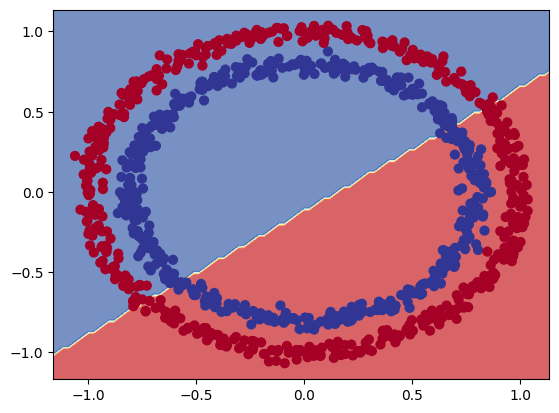

In [14]:
plot_decision_boundary(model1,X,y)

In [43]:
tf.random.set_seed(42)

model2=tf.keras.Sequential([
    tf.keras.layers.Dense(4,activation="relu"),
    tf.keras.layers.Dense(2,activation="relu"),
    tf.keras.layers.Dense(1,activation="sigmoid")
])

model2.compile(loss=tf.keras.losses.BinaryCrossentropy(),
               optimizer=tf.keras.optimizers.Adam(learning_rate=0.003),
               metrics=["accuracy"])

history=model2.fit(X,y,epochs=100)

Epoch 1/100
32/32 [==============================] - 1s 2ms/step - loss: 0.6913 - accuracy: 0.5010
Epoch 2/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6894 - accuracy: 0.5080
Epoch 3/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6876 - accuracy: 0.5170
Epoch 4/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6858 - accuracy: 0.5380
Epoch 5/100
32/32 [==============================] - 0s 3ms/step - loss: 0.6834 - accuracy: 0.5490
Epoch 6/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6801 - accuracy: 0.5560
Epoch 7/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6768 - accuracy: 0.6430
Epoch 8/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6734 - accuracy: 0.5760
Epoch 9/100
32/32 [==============================] - 0s 3ms/step - loss: 0.6690 - accuracy: 0.6010
Epoch 10/100
32/32 [==============================] - 0s 3ms/step - loss: 0.6653 - accuracy: 0.5600
Epoch 11/

In [44]:
y_pred=model2.predict(X)
y_pred

32/32 [==============================] - 0s 885us/step


array([[9.57472265e-01],
       [9.93176162e-01],
       [9.24715936e-01],
       [9.68633831e-01],
       [1.29955932e-01],
       [8.09956908e-01],
       [9.90098536e-01],
       [9.82807398e-01],
       [8.02426338e-01],
       [7.14126369e-03],
       [9.15823817e-01],
       [1.05913300e-02],
       [9.88729537e-01],
       [9.33983982e-01],
       [7.58382261e-01],
       [9.83559191e-01],
       [1.02285966e-02],
       [9.64431167e-01],
       [7.97042966e-01],
       [3.52706879e-01],
       [9.88972008e-01],
       [2.31649756e-04],
       [1.29955932e-01],
       [9.43474710e-01],
       [5.54629564e-02],
       [6.77985027e-02],
       [4.03858663e-04],
       [9.77841854e-01],
       [9.54691648e-01],
       [8.91645193e-01],
       [1.29955932e-01],
       [2.59958059e-02],
       [9.95125353e-01],
       [1.84335224e-02],
       [1.29955932e-01],
       [1.95935150e-04],
       [9.54741716e-01],
       [9.69322503e-01],
       [9.69931543e-01],
       [7.16020865e-03],


313/313 [==============================] - 0s 630us/step
doing binary classifcation...


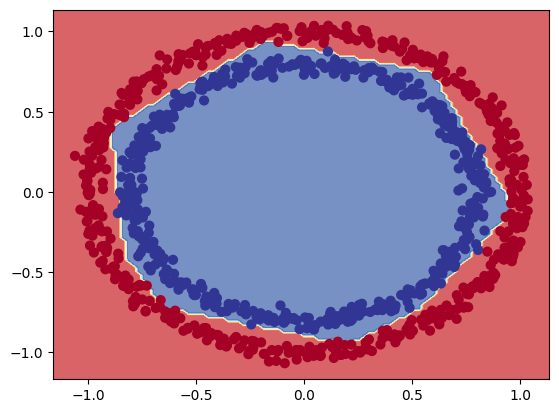

In [45]:
plot_decision_boundary(model2,X,y)